# Setting up the environment

If running locally, please install mamba on your own!

In [1]:
import os
root_dir = "/content"
using_colab=True

In [2]:
if using_colab:
    !pip install -q condacolab
    import condacolab
    condacolab.install()

✨🍰✨ Everything looks OK!


In [6]:
!git clone --quiet https://github.com/computational-cell-analytics/micro-sam.git
tmp_dir = os.path.join(root_dir, "micro-sam")
!pip install --quiet $tmp_dir

fatal: destination path 'micro-sam' already exists and is not an empty directory.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Operation cancelled by user


In [4]:
!git clone --quiet https://github.com/constantinpape/torch-em.git
tmp_dir = os.path.join(root_dir, "torch-em")
!pip install --quiet $tmp_dir

Traceback (most recent call last):
  File "/usr/local/bin/pip", line 6, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spinners import open_spinner
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/cli/spinners.py", line 9, in <module>
    from pip._internal.utils.logging import get_indentation
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/utils

In [5]:
!git clone --quiet https://github.com/constantinpape/elf.git
tmp_dir = os.path.join(root_dir, "elf")
!pip install --quiet $tmp_dir

  Installing build dependencies ... canceledERROR: Operation cancelled by user


In [ ]:
!mamba install -q -y -c conda-forge nifty affogato zarr z5py natsort > /dev/null 2>&1
!pip uninstall -y --quiet qtpy  # qtpy is not supported in Kaggle / Google Colab, let's remove it to avoid errors.

In [ ]:
!pip install kornia --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.4/899.4 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.8 MB/s eta 0:00:00


In [ ]:
!pip install xxhash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.3 MB/s eta 0:00:00


In [ ]:
from micro_sam.automatic_segmentation import get_predictor_and_segmenter, automatic_instance_segmentation

In [ ]:
!pip install --quiet git+https://github.com/facebookresearch/segment-anything.git

  Preparing metadata (setup.py) ... done


In [9]:
import sys
if using_colab:
    !{sys.executable} -m pip install opencv-python matplotlib
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/sam2.git'

!mkdir -p ../checkpoints/
!wget -P ../checkpoints/ https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_large.pt
!wget -P ../checkpoints/ https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_large.pt

  Cloning https://github.com/facebookresearch/sam2.git to /tmp/pip-req-build-r_3p7viv
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/sam2.git /tmp/pip-req-build-r_3p7viv
  Resolved https://github.com/facebookresearch/sam2.git to commit c2ec8e14a185632b0a5d8b161928ceb50197eddc
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.1 MB/s eta 0:00:00
  Created wheel for SAM-2: filename=SAM_2-1.0-cp310-cp310-linux_x86_64.whl size=508566 sha256=1dfbfc86a982a22f03ebe4b5f8c7dc16345700acea88c89

In [10]:
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor


/usr/local/lib/python3.10/dist-packages/sam2/modeling/sam/transformer.py:23: UserWarning: Flash Attention is disabled as it requires a GPU with Ampere (8.0) CUDA capability.
  OLD_GPU, USE_FLASH_ATTN, MATH_KERNEL_ON = get_sdpa_settings()


# Other imports

In [12]:
import numpy as np
from typing import Iterator
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
import torch

from transformers import AutoProcessor, CLIPSegForImageSegmentation
import albumentations as A
from skimage.measure import label, centroid

In [13]:
project_root = "/content/drive/MyDrive/CV/project" # feel free to change it to your own

In [14]:
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

In [15]:
def evaluate(test_data: Iterator, predictor, transformation=lambda mask: mask, num_visualized=3) -> float:
  """
  test_data: contains an iterator of tuples. First element of which should be the image, the another should be the ground truth mask.
             Both of type np.ndarray
  predictor: a function, where given an image, outputs its predicted segmentation mask as an numpy array in the CPU. The mask should be binary
  transformation: a function that transforms the ground truth mask to the same form as the predicted mask
  """
  sum_iou = 0
  num_images = 0

  visualizations = []

  for im, gt_mask in test_data:
    pred_mask = predictor(im)
    gt_mask = transformation(gt_mask)

    intersection = np.logical_and(gt_mask, pred_mask)
    union = np.logical_or(gt_mask, pred_mask)
    iou_score = np.sum(intersection) / np.sum(union)

    if num_images < num_visualized:
      visualizations.append((im, gt_mask, pred_mask, iou_score))

    sum_iou+=iou_score
    num_images+=1

  for im, gt_mask, pred_mask, iou_score in visualizations:
    fig, ax = plt.subplots(1, 3, figsize=(15, 20))
    ax[0].imshow(im)
    ax[0].set_title('Image')
    ax[1].imshow(gt_mask)
    ax[1].set_title('Ground Truth Mask')
    ax[2].imshow(pred_mask)
    ax[2].set_title(f'Predicted Mask: IoU={np.round(iou_score, decimals=5)}')

  plt.show()

  return sum_iou/num_images



The images and ground truth masks were pre-computed from the reproduction of ClipSeg. Just loading these in

In [16]:
if using_colab:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


Reading in dataset binaries generated by ClipSeg reproduction notebook

In [17]:
imgs_test=np.load(project_root+ "/dataset_binaries/4.npy")
msks_test=np.load(project_root+ "/dataset_binaries/5.npy")

# Baseline (Prompt by ClipSeg + SAM 2 Zero-shot)

In [18]:
clipseg_processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
clipseg_model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")
clipseg_model.load_state_dict(torch.load(project_root+ "/finetuned_CLIPSeg.pth", weights_only=True))
clipseg_model.eval()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/974 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.73k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/603M [00:00<?, ?B/s]

CLIPSegForImageSegmentation(
  (clip): CLIPSegModel(
    (text_model): CLIPSegTextTransformer(
      (embeddings): CLIPSegTextEmbeddings(
        (token_embedding): Embedding(49408, 512)
        (position_embedding): Embedding(77, 512)
      )
      (encoder): CLIPSegEncoder(
        (layers): ModuleList(
          (0-11): 12 x CLIPSegEncoderLayer(
            (self_attn): CLIPSegAttention(
              (k_proj): Linear(in_features=512, out_features=512, bias=True)
              (v_proj): Linear(in_features=512, out_features=512, bias=True)
              (q_proj): Linear(in_features=512, out_features=512, bias=True)
              (out_proj): Linear(in_features=512, out_features=512, bias=True)
            )
            (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
            (mlp): CLIPSegMLP(
              (activation_fn): QuickGELUActivation()
              (fc1): Linear(in_features=512, out_features=2048, bias=True)
              (fc2): Linear(in_features=20

In [26]:
sam2_checkpoint = "../checkpoints/sam2.1_hiera_large.pt"
sam2_model_cfg = "configs/sam2.1/sam2.1_hiera_l.yaml"

sam2_model = build_sam2(sam2_model_cfg, sam2_checkpoint, device=device)

sam2_predictor = SAM2ImagePredictor(sam2_model)

Copied from PromptGeneration

In [27]:
def infer_clipseg(img, model=clipseg_model, processor=clipseg_processor):
  texts = ['tumor in brain']
  new_size = (352, 352)
  model = model.to(device)

  transform = A.Resize(new_size[0], new_size[1])

  augmented = transform(image=np.array(img))
  img_transformed = augmented['image']

  inputs = processor(text=texts, images=[img_transformed] * len(texts), padding=True, return_tensors="pt").to(device)

  output_mask = model(**inputs, interpolate_pos_encoding=True)[0]
  binary_output_mask = torch.sigmoid(output_mask) > 0.5

  return np.squeeze(binary_output_mask.cpu().detach().float().numpy(), 0)

def generate_prompt(img, demo=False):
  initial_mask = infer_clipseg(img)
  labels, num_masks = label(initial_mask, return_num=True)
  biggest = [0,0]
  for i in range(1, num_masks+1): # pick the biggest area's centroid
    area=np.sum(labels==i)
    if area>biggest[1]:
      biggest = [i, area]

  prompt_y, prompt_x = centroid(labels==biggest[0])
  width, height = img.size

  def scale(point, size): return np.round(point*size/352).astype(int)

  prompt_point = (scale(prompt_x, width) , scale(prompt_y, height)) # scale it back

  if demo:
    return prompt_point, initial_mask, (prompt_x, prompt_y)
  else:
    return prompt_point


In [28]:
def infer_sam2(img, predictor=sam2_predictor):
  prompt_point = generate_prompt(Image.fromarray(img))
  predictor.set_image(img)
  point_coords, point_labels = np.array([list(prompt_point)]), np.array([1])
  masks, scores, _ = predictor.predict(
        point_coords=point_coords,
        point_labels=point_labels,
        multimask_output=False,)
  sorted_ind = np.argsort(scores)[::-1]
  masks = masks[sorted_ind]

  return masks[0]


/usr/local/lib/python3.10/dist-packages/transformers/image_processing_utils.py:41: UserWarning: The following named arguments are not valid for `ViTImageProcessor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)


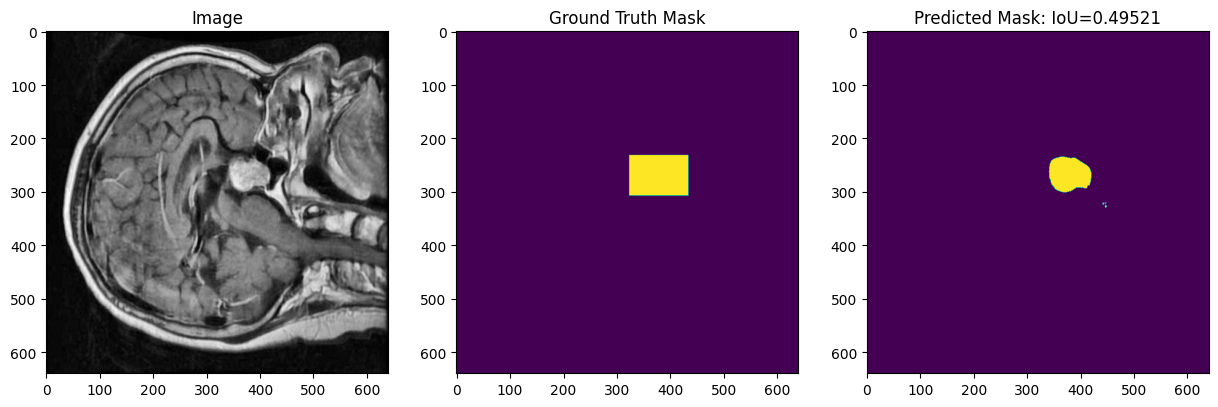

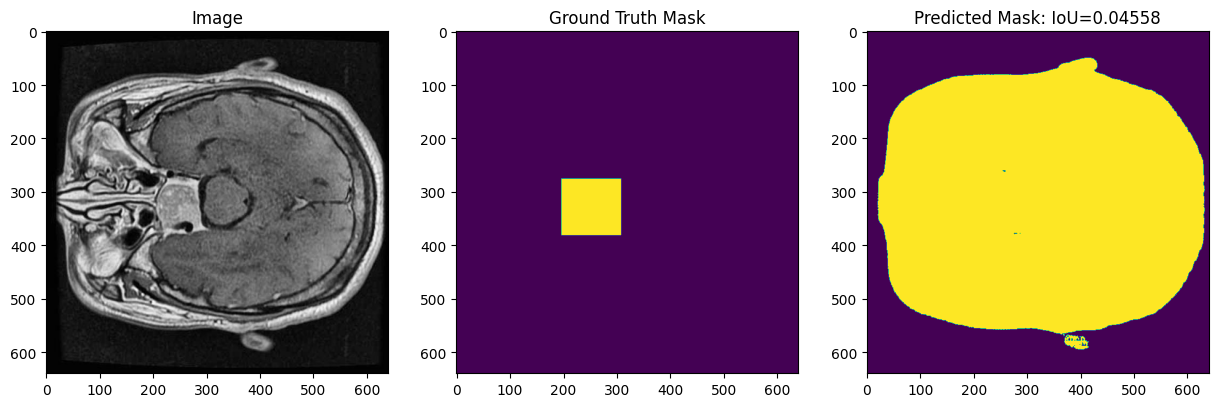

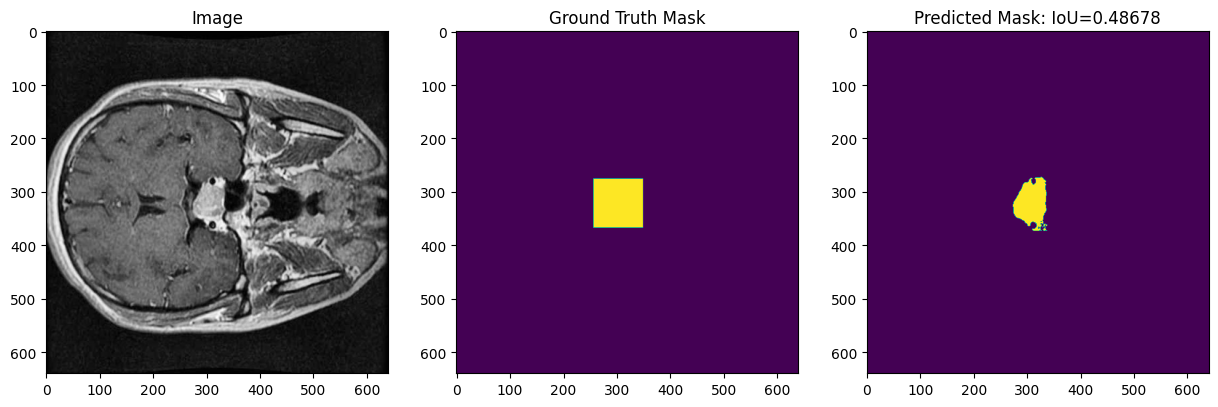

The mean IoU score for zero-shot SAM2 is 0.2849859390650935


In [29]:
mean_iou_baseline = evaluate(
    test_data=zip(imgs_test, msks_test),
    predictor=infer_sam2,
)

print(f"The mean IoU score for zero-shot SAM2 is {mean_iou_baseline}")

# Prompt by ClipSeg + Finetuned SAM 2

In [ ]:
sam2_predictor.model.load_state_dict(torch.load(project_root + "/sam2_finetuned.pth")["model_state_dict"])

In [ ]:
mean_iou_baseline = evaluate(
    test_data=zip(imgs_test, msks_test),
    predictor=infer_sam2,
)

print(f"The mean IoU score for fine-tuned SAM2 is {mean_iou_baseline}")

# Prompt by ClipSeg + microSAM

In [ ]:
model_type = "vit_h"
checkpoint_path = project_root+'/sam_hela_vit_h/checkpoints/sam_hela_vit_h/best.pt'

predictor, segmenter = get_predictor_and_segmenter( # you need GPU RAM >16GB
        model_type=model_type,
        checkpoint=checkpoint_path,
        device=device,
    )

Compute Image Embeddings 2D.: 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


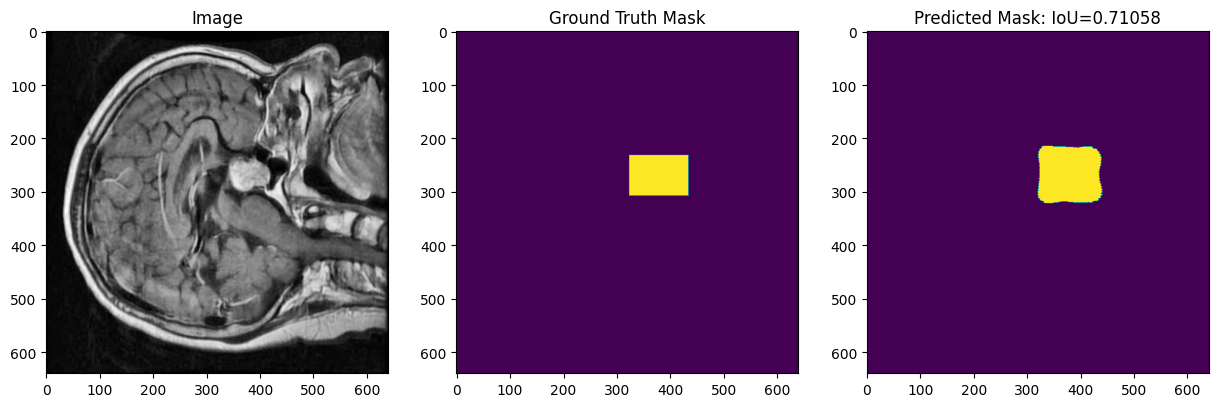

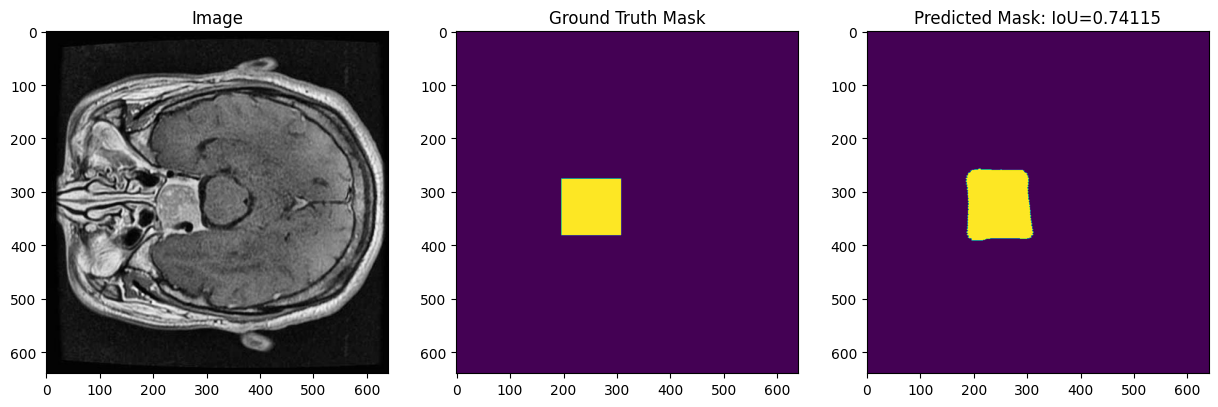

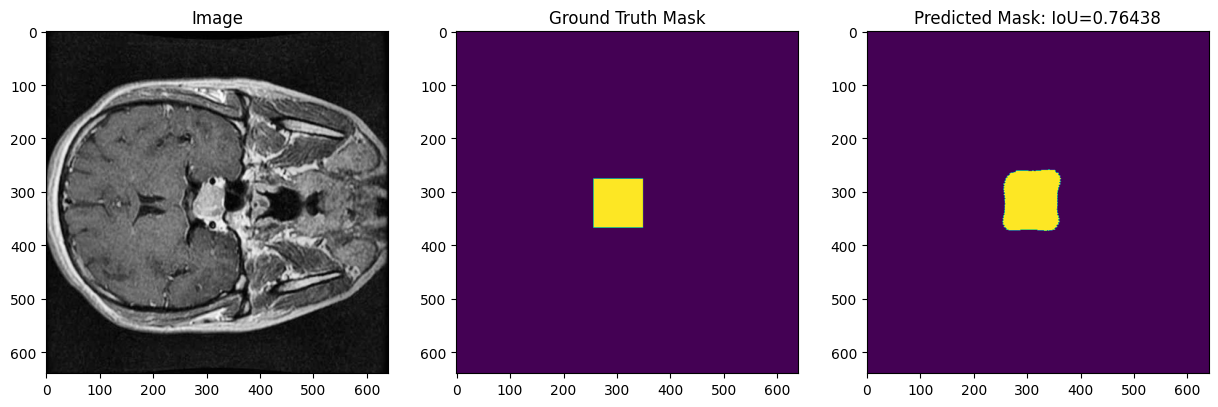

The mean IoU score for microSAM after finetuning is 0.5924542580519364


In [ ]:
mean_iou_microsam = evaluate(
    test_data=zip(imgs_test, msks_test),
    predictor=lambda image: automatic_instance_segmentation(
        predictor=predictor,
        segmenter=segmenter,
        input_path=image,
        ndim=2,
    ),
)

print(f"The mean IoU score for microSAM after finetuning is {mean_iou_microsam}")